In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score, accuracy_score, roc_curve, roc_auc_score, confusion_matrix
import xgboost 
import pickle

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import modelEvalUtils as meu
%matplotlib inline
sns.set()

/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df = pd.read_csv("genetic_EDA_st.csv")
df = df.drop(["Unnamed: 0"], axis = 1)

In [3]:
df

,AF_ESP,LoFtool,CADD_PHRED,2KB_upstream_variant,3_prime_UTR_variant,500B_downstream_variant,5_prime_UTR_variant,frameshift_variant,intron_variant,missense_variant,...,RYR2,SCN5A,SMARCA4,STK11,SYNE1,TP53,TSC2,TTN,other-gene,CLASS
0,-0.252343,-0.676789,-1.437014,-0.086095,-0.110231,-0.023933,-0.186966,-0.139141,-0.492506,0.965831,...,-0.073369,-0.070893,-0.086492,-0.076438,-0.084392,-0.083477,-0.103211,-0.218783,0.796767,0
1,2.364400,-0.676789,0.662147,-0.086095,-0.110231,-0.023933,-0.186966,-0.139141,-0.492506,0.965831,...,-0.073369,-0.070893,-0.086492,-0.076438,-0.084392,-0.083477,-0.103211,-0.218783,0.796767,0
2,-0.252343,-0.676789,-0.408216,-0.086095,-0.110231,-0.023933,-0.186966,-0.139141,-0.492506,0.965831,...,-0.073369,-0.070893,-0.086492,-0.076438,-0.084392,-0.083477,-0.103211,-0.218783,0.796767,1
3,-0.175026,-0.898177,0.579387,-0.086095,-0.110231,-0.023933,-0.186966,-0.139141,-0.492506,0.965831,...,-0.073369,-0.070893,-0.086492,-0.076438,-0.084392,-0.083477,-0.103211,-0.218783,0.796767,0
4,-0.219698,-0.898177,0.947209,-0.086095,-0.110231,-0.023933,-0.186966,-0.139141,-0.492506,0.965831,...,-0.073369,-0.070893,-0.086492,-0.076438,-0.084392,-0.083477,-0.103211,-0.218783,0.796767,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59387,0.010534,-0.951919,-0.400859,-0.086095,-0.110231,-0.023933,-0.186966,-0.139141,-0.492506,-1.035378,...,-0.073369,-0.070893,-0.086492,-0.076438,-0.084392,-0.083477,-0.103211,-0.218783,0.796767,0
59388,1.123896,-0.951919,-1.443175,-0.086095,-0.110231,-0.023933,-0.186966,-0.139141,-0.492506,-1.035378,...,-0.073369,-0.070893,-0.086492,-0.076438,-0.084392,-0.083477,-0.103211,-0.218783,0.796767,0
59389,-0.217980,-0.951919,-1.452646,-0.086095,-0.110231,-0.023933,-0.186966,-0.139141,-0.492506,0.965831,...,-0.073369,-0.070893,-0.086492,-0.076438,-0.084392,-0.083477,-0.103211,-0.218783,0.796767,1
59390,-0.037574,-0.951919,-0.271202,-0.086095,-0.110231,-0.023933,-0.186966,-0.139141,-0.492506,-1.035378,...,-0.073369,-0.070893,-0.086492,-0.076438,-0.084392,-0.083477,-0.103211,-0.218783,0.796767,0


In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(df.drop("CLASS", axis =1), 
                                                    df.CLASS,
                                                   test_size =0.3,
                                                   random_state = 41)

In [6]:
model_names = ["xgb", "logit", "knn", "rf"]
for model_name in model_names:
    with open(f"{model_name}.pickle", "rb") as file:
        exec(f"{model_name} = pickle.load(file)")

In [7]:
model_vars = [eval(n) for n in model_names]


In [72]:

model_vars = [eval(n) for n in model_names]
plot_vars = [meu.makeROCPlot(X_test, Y_test, eval(n), plot=False) for n in model_names]

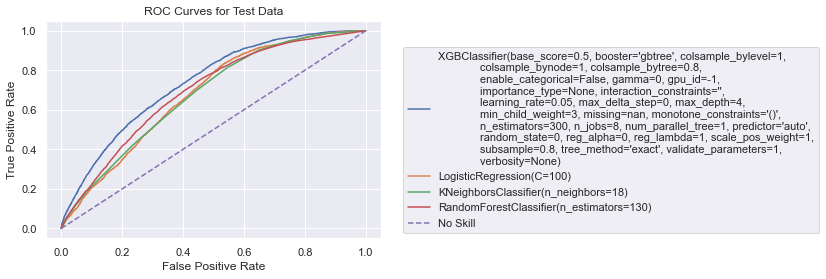

In [46]:
meu.makeCombinedROC(plot_vars, model_vars)

In [8]:
model_vars = [eval(n) for n in model_names]
plot_vars = [meu.makeScorePlot(X_test, Y_test, eval(n), plot=False) for n in model_names]

/Users/chioun/Desktop/metis_data_camp/Github_repo/Classification/modelEvalUtils.py:95: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/chioun/Desktop/metis_data_camp/Github_repo/Classification/modelEvalUtils.py:95: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/chioun/Desktop/metis_data_camp/Github_repo/Classification/modelEvalUtils.py:95: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/chioun/Desktop/metis_data_camp/Github_repo/Classification/modelEvalUtils.py:95: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


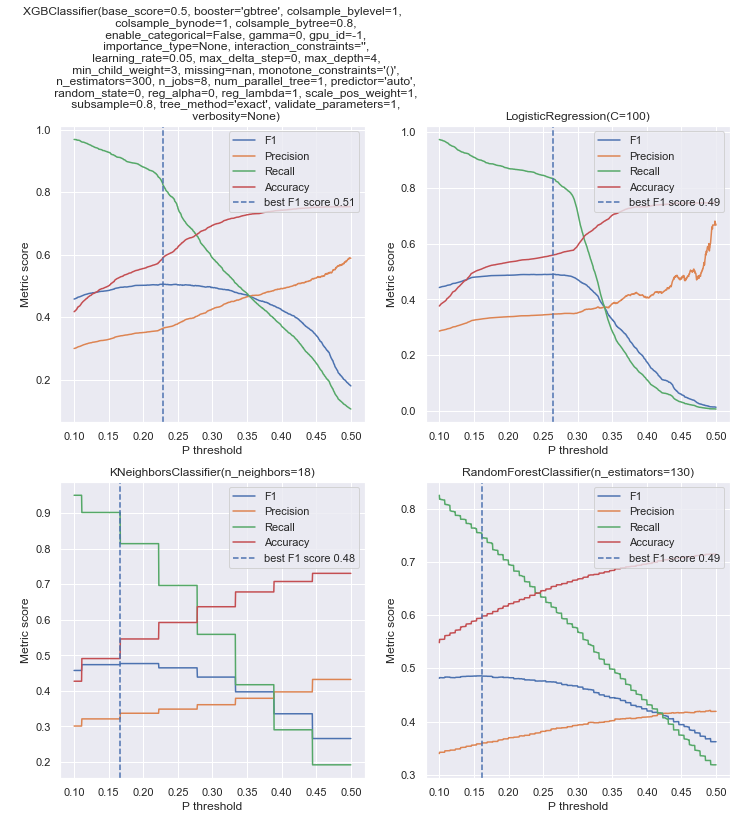

In [9]:
meu.makeCombinedScore(plot_vars, model_vars)

In [29]:
def print_score(inputX, inputY):
    f_score = f1_score(inputX, inputY)
    p_score = precision_score(inputX, inputY)
    r_score = recall_score(inputX, inputY)
    a_score = accuracy_score(inputX, inputY)
    print("f1 score:", round(f_score, 2))
    print("Precision score:", round(p_score, 2))
    print("Recall score:", round(r_score, 2))
    print("Accuracy score:", round(a_score, 2))

Other_evaluation

In [37]:
print_score(Y_train, xgb.predict(X_train))

f1 score: 0.19
Precision score: 0.65
Recall score: 0.11
Accuracy score: 0.76


In [38]:
print_score(Y_test, xgb.predict(X_test))

f1 score: 0.18
Precision score: 0.59
Recall score: 0.11
Accuracy score: 0.75


Text(0.5, 0, 'Xgboost Feature Importance')

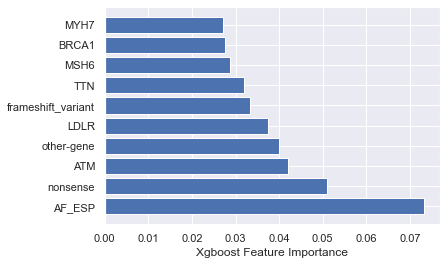

In [39]:
sorted_idx = xgb.feature_importances_.argsort()[::-1]
plt.barh(X_train.columns[sorted_idx][:10], xgb.feature_importances_[sorted_idx][:10])
plt.xlabel("Xgboost Feature Importance")

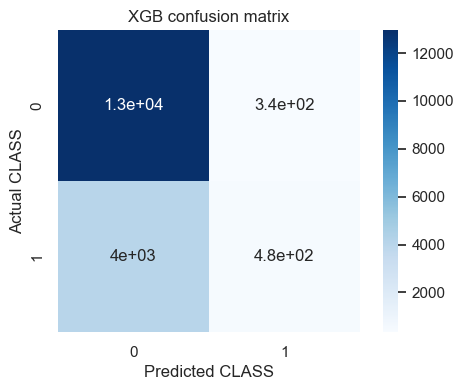

In [41]:
from sklearn.metrics import confusion_matrix
xgb_confusion = confusion_matrix(Y_test, xgb.predict(X_test))
plt.figure(dpi=100)
sns.heatmap(xgb_confusion, cmap=plt.cm.Blues, annot=True, square=True)

plt.xlabel('Predicted CLASS')
plt.ylabel('Actual CLASS')
plt.title('XGB confusion matrix');